# Chapter 2. Supervised Learning methods.
# Part 1. KNN method.

## - Some datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

## Forge dataset (artificial)

In [2]:
#taking datasets
X, y = mglearn.datasets.make_forge()
X.shape

/home/akado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(26, 2)

Text(0, 0.5, 'Second feature')

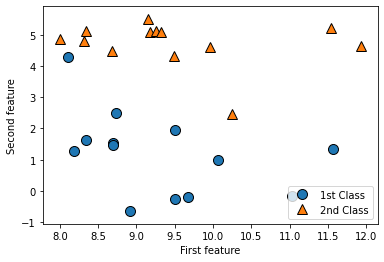

In [3]:
#building plot
#%matplotlib inline #allows to add plots to the browser inteface
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #plot building

plt.legend(["1st Class", "2nd Class"], loc=4) #legend
plt.xlabel("First feature")
plt.ylabel("Second feature")

## Wave dataset (artificial)

In [4]:
#taking datasets
X, y = mglearn.datasets.make_wave(n_samples =40)
X.shape

(40, 1)

Text(0, 0.5, 'Target value')

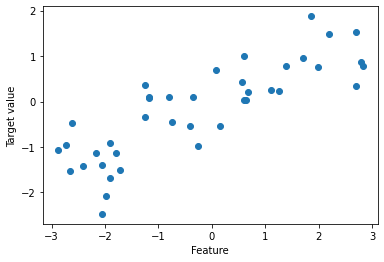

In [5]:
#building plot
plt.plot(X, y, 'o')

plt.xlabel("Feature")
plt.ylabel("Target value")

## Cancer dataset (natural)

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [7]:
print(cancer.keys())
print(cancer.data.shape)
print(cancer.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
#building a hash table to examine dataset
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

## Boston Housing dataset (natural)

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


## Boston Housing extended dataset (natural)

In [11]:
X, y = mglearn.datasets.load_extended_boston()

#104 features are previous 13 default features...
#...plus 91 derivative features
X.shape

(506, 104)

## - KNN Classifier. Analysis.

## model implementation

In [12]:
#-----model initialization
#import dataset and split to learning and test sets
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#import model class and creating a class object
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

#building model
clf.fit(X_train, y_train)

#-----model validation
#prognostication
print(clf.predict(X_test))

#accuracy check
clf.score(X_test,y_test)

[1 0 1 0 1 0 0]


/home/akado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


0.8571428571428571

## Analysis. Difference between decision boundaries depending on model complexity

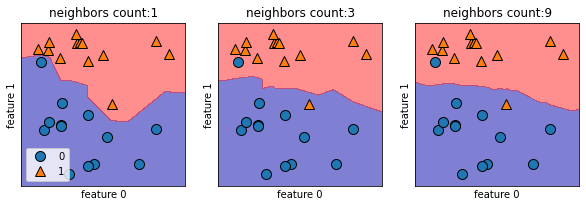

In [13]:
#-----desision boundary visualization for 1, 3 and 9 neighbors.
#creating figure and axes
fig, axes = plt.subplots(1, 3, figsize=(10,3))

#creating classificator objects and their plots
for n_neighbors, ax in zip([1,3,9], axes):
    #model initialization and building
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    #rendering labeled areas in axes
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=0.5, ax=ax)
    #render samples in axes
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("neighbors count:{}".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

## Analysis. Influence of model complexity on generalization ability

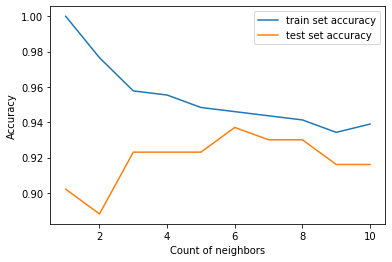

In [14]:
from sklearn.datasets import load_breast_cancer

#loading dataset
cancer = load_breast_cancer()
#splitting dataset on train and test sets
#argument 'stratify' keeps the proportions of gain set...
#...for resulting set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
#checking n_neighbors from 1 to 10
neighbors_settings = range(1,11)

#creating classificator objects
for n_neighbors in neighbors_settings:
    #model initialization and building
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    #adding gain train accuracies to the array
    training_accuracy.append(clf.score(X_train, y_train))
    #adding gain test accuracies to the array
    test_accuracy.append(clf.score(X_test, y_test))    

plt.plot(neighbors_settings, training_accuracy, label="train set accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test set accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Count of neighbors")
plt.legend()

## - KNN regressor. Analysis.

## Model implementation

In [15]:
#importing regressor class
from sklearn.neighbors import KNeighborsRegressor

#loading dataset
X, y = mglearn.datasets.make_wave(n_samples=40)
#splitting dataset on train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#creating model object
reg = KNeighborsRegressor(n_neighbors=3)
#building model
reg.fit(X_train, y_train)

#getting prognostications
reg.predict(X_test)

#model validation
reg.score(X_test, y_test)

0.8344172446249605

## Analysis. Influence of model complexity on generalization ability

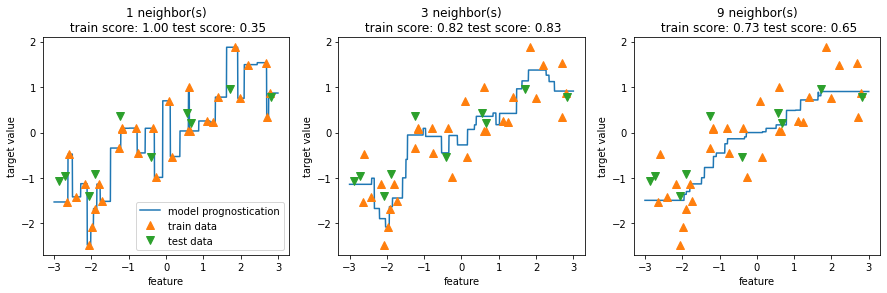

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
#creating 1000 samples evenly distributed between -3 and 3...
#...and transposing row to column
line = np.linspace(-3, 3, 1000).reshape(-1,1)

#getting prognostications for 1, 3 and 9 neighbors
for n_neighbors, ax in zip([1,3,9], axes):
    #creating model object
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    #building model
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=8)
    ax.plot(X_test, y_test, "v", markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target value")
axes[0].legend(["model prognostication", "train data", "test data"], loc="best")